# Importing Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# Loading data 

In [6]:
train = pd.read_csv('C:/Users/ankus/Downloads/9961_14084_bundle_archive/Train.csv')
test_data = pd.read_csv('C:/Users/ankus/Downloads/9961_14084_bundle_archive/test.csv')

# Know your Data

In [7]:
train.shape

(8523, 12)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
train.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [10]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Finding Missing Values

In [11]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
train.duplicated().sum()

0

In [13]:
train.apply(lambda x : len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

# Numerical and Categorical Variables

In [14]:
cat_col = train.select_dtypes(exclude='number').columns.to_list()
num_col = train.select_dtypes(include='number').columns.to_list()
print(cat_col,'\n')
print(num_col)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'] 

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


In [15]:
for col in cat_col:
    print('===========================')
    print('Series:','   ',col)
    print('===========================')
    print(train[col].value_counts())
    print('\n')

Series:     Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Series:     Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Series:     Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Series:     Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045

# Missing Values Treatment

In [16]:
clean_data = train.copy()

In [17]:
# format column names to be lower-case
new_col_names = [col.lower() for col in clean_data.columns]
clean_data.columns = new_col_names

print(clean_data.columns)

Index(['item_identifier', 'item_weight', 'item_fat_content', 'item_visibility',
       'item_type', 'item_mrp', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type', 'item_outlet_sales'],
      dtype='object')


In [18]:
clean_data['item_weight'].fillna(clean_data['item_weight'].mean(),inplace=True)
clean_data.isnull().sum()

item_identifier                 0
item_weight                     0
item_fat_content                0
item_visibility                 0
item_type                       0
item_mrp                        0
outlet_identifier               0
outlet_establishment_year       0
outlet_size                  2410
outlet_location_type            0
outlet_type                     0
item_outlet_sales               0
dtype: int64

In [19]:
outlet_size_mode_pt = clean_data.pivot_table(values='outlet_size',columns='outlet_type',aggfunc=lambda x: x.mode())
outlet_size_mode_pt

outlet_type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
outlet_size,Small,Small,Medium,Medium


In [20]:
missing_values = clean_data['outlet_size'].isnull()

In [21]:
clean_data.loc[missing_values, 'outlet_size'] = clean_data.loc[missing_values, 'outlet_type'].apply(lambda x: outlet_size_mode_pt[x].outlet_size)

In [22]:
clean_data.isnull().sum()

item_identifier              0
item_weight                  0
item_fat_content             0
item_visibility              0
item_type                    0
item_mrp                     0
outlet_identifier            0
outlet_establishment_year    0
outlet_size                  0
outlet_location_type         0
outlet_type                  0
item_outlet_sales            0
dtype: int64

In [23]:
print(sum(clean_data['item_visibility'])==0)

False


In [24]:
clean_data['item_fat_content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [25]:
clean_data['item_fat_content'].replace({'low fat':'Low Fat','reg':'Regular','LF':'Low Fat'},inplace=True)

In [26]:
clean_data['item_fat_content'].value_counts()

Low Fat    5517
Regular    3006
Name: item_fat_content, dtype: int64

In [27]:
clean_data['item_category'] = clean_data['item_identifier'].apply(lambda x: x[:2])
clean_data['item_category'] = clean_data['item_category'].replace({'FD':'Food', 'DR':'Drink', 'NC':'Non-Consumable'})
clean_data['item_category'].value_counts()

Food              6125
Non-Consumable    1599
Drink              799
Name: item_category, dtype: int64

In [28]:
clean_data['item_category'].head(5)

0              Food
1             Drink
2              Food
3              Food
4    Non-Consumable
Name: item_category, dtype: object

In [29]:
clean_data['outlet_age'] = 2013 - clean_data['outlet_establishment_year']
clean_data['outlet_age']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: outlet_age, Length: 8523, dtype: int64

In [30]:
clean_data.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,item_category,outlet_age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drink,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


array([[<AxesSubplot:title={'center':'item_weight'}>,
        <AxesSubplot:title={'center':'item_visibility'}>],
       [<AxesSubplot:title={'center':'item_mrp'}>,
        <AxesSubplot:title={'center':'outlet_establishment_year'}>],
       [<AxesSubplot:title={'center':'item_outlet_sales'}>,
        <AxesSubplot:title={'center':'outlet_age'}>]], dtype=object)

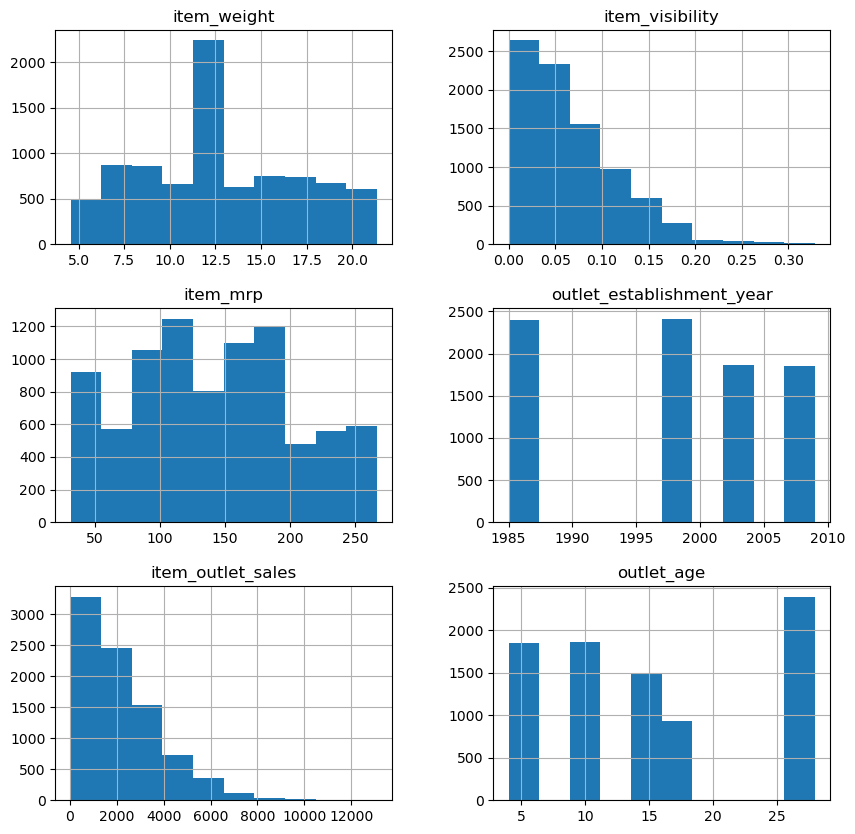

In [31]:
clean_data.hist(figsize=(10,10))

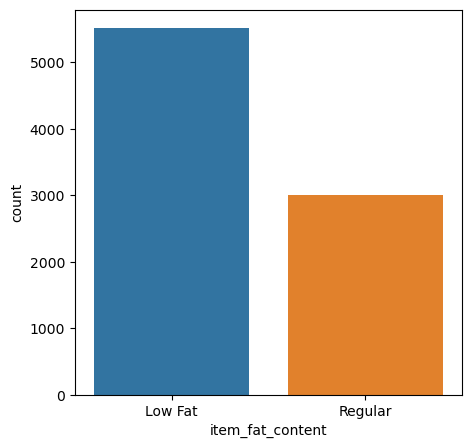

In [32]:
plt.figure(figsize=(5,5))
sns.countplot(x='item_fat_content', data=clean_data)
plt.show()

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

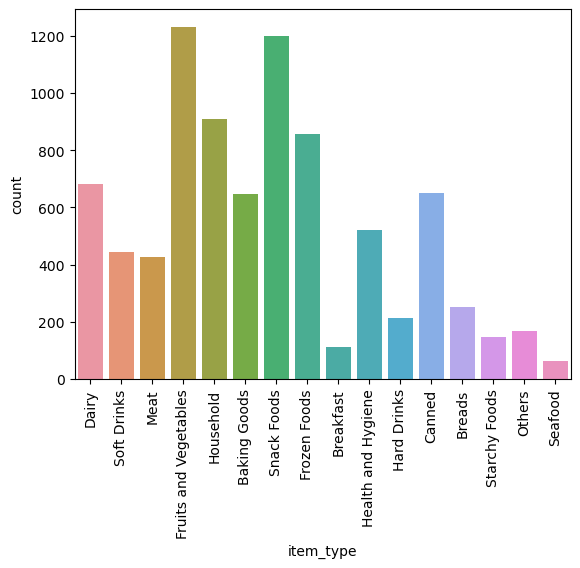

In [33]:
labels = list(clean_data['item_type'].unique())
chart = sns.countplot(x=clean_data['item_type'])
chart.set_xticklabels(labels=labels, rotation=90)

[Text(0, 0, 'OUT049'),
 Text(1, 0, 'OUT018'),
 Text(2, 0, 'OUT010'),
 Text(3, 0, 'OUT013'),
 Text(4, 0, 'OUT027'),
 Text(5, 0, 'OUT045'),
 Text(6, 0, 'OUT017'),
 Text(7, 0, 'OUT046'),
 Text(8, 0, 'OUT035'),
 Text(9, 0, 'OUT019')]

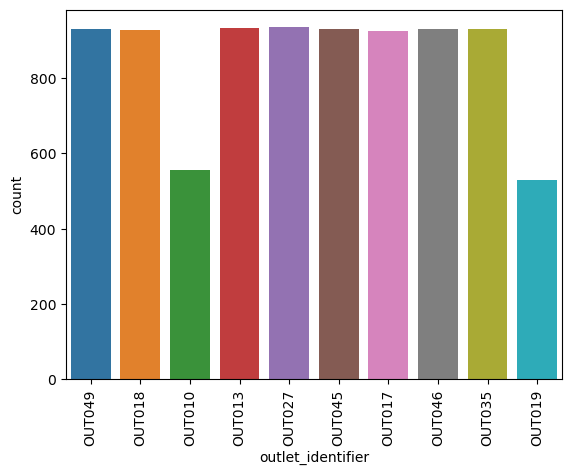

In [34]:
# plot outlet_identifier
labels = list(clean_data['outlet_identifier'].unique())
chart = sns.countplot(x=clean_data['outlet_identifier'])
chart.set_xticklabels(labels=labels, rotation=90)

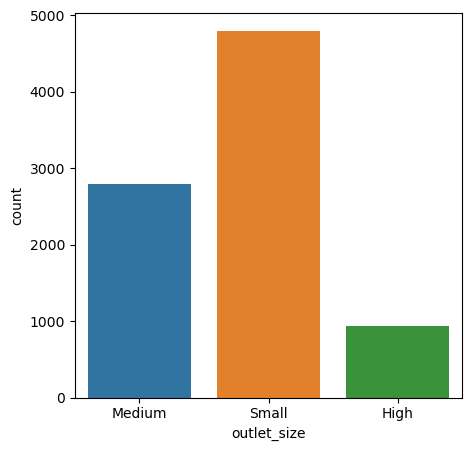

In [35]:
# plot outlet_size
plt.figure(figsize=(5,5))
sns.countplot(x='outlet_size', data=clean_data)
plt.show()

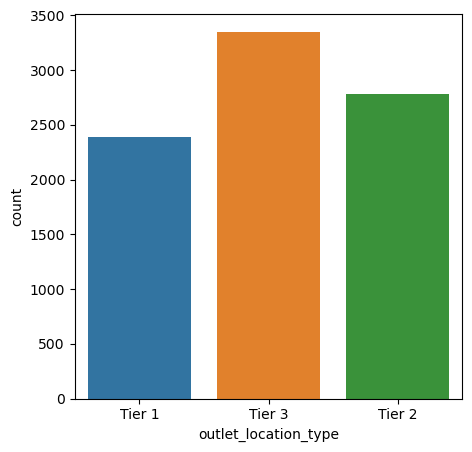

In [36]:
# plot outlet_location_type
plt.figure(figsize=(5,5))
sns.countplot(x='outlet_location_type', data=clean_data)
plt.show()

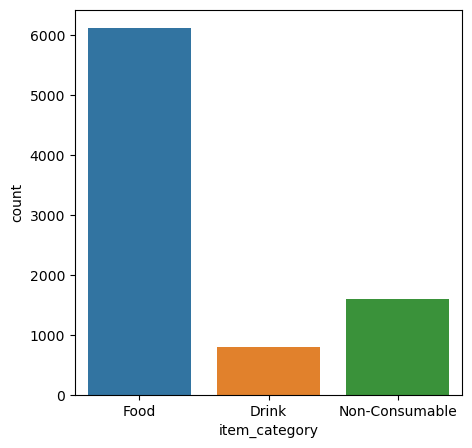

In [37]:
# plot item_category
plt.figure(figsize=(5,5))
sns.countplot(x='item_category', data=clean_data)
plt.show()

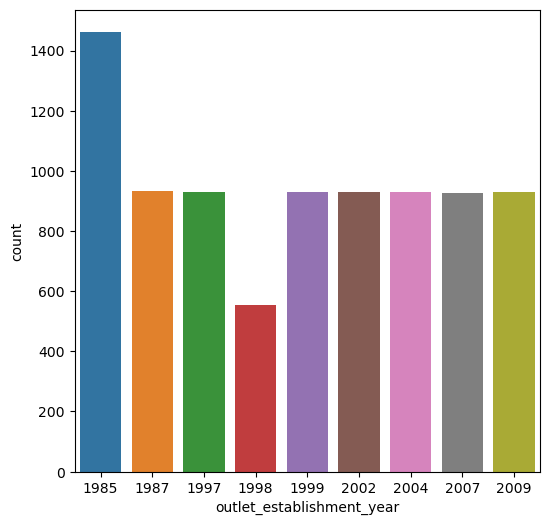

In [38]:
# outlet_establishment_year column count
plt.figure(figsize=(6,6))
sns.countplot(x='outlet_establishment_year', data=clean_data)
plt.show()

In [39]:
# correlation with the target column
corr_matrix = clean_data.corr()
corr_matrix['item_outlet_sales'].sort_values(ascending=False)

item_outlet_sales            1.000000
item_mrp                     0.567574
outlet_age                   0.049135
item_weight                  0.011550
outlet_establishment_year   -0.049135
item_visibility             -0.128625
Name: item_outlet_sales, dtype: float64

<AxesSubplot:>

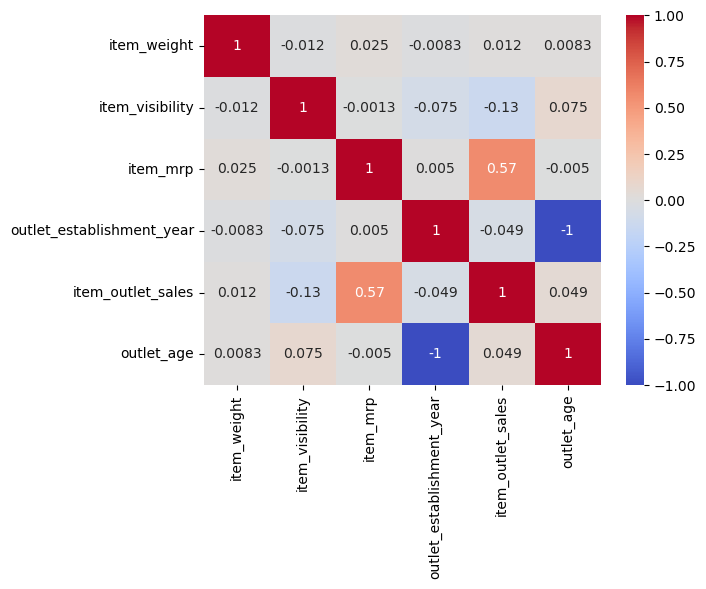

In [40]:
# plot correlations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

<AxesSubplot:xlabel='item_mrp', ylabel='item_outlet_sales'>

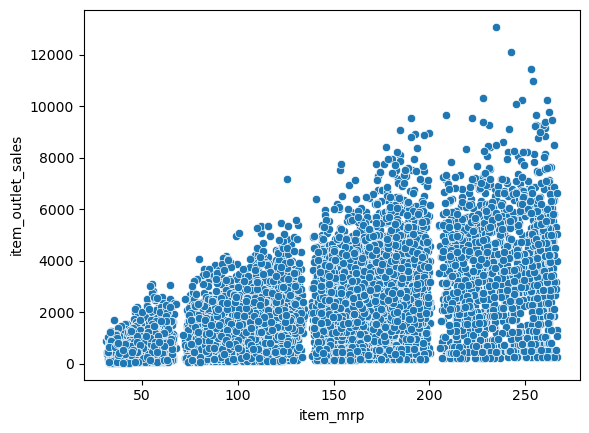

In [41]:
# scatter plot of item_mrp and item_outlet_sales
sns.scatterplot(data=clean_data, x='item_mrp', y='item_outlet_sales')

# Data Pre-processing

### Label encoding

In [42]:
clean_data.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,item_category,outlet_age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drink,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


In [43]:
# applying label encoding to some features
encoder = LabelEncoder()

cols_to_encode = ['item_identifier', 'item_type', 'outlet_identifier']

for col in cols_to_encode:
    clean_data[col] = encoder.fit_transform(clean_data[col])

In [44]:
# applying one-hot encoding to some features
clean_data = pd.get_dummies(clean_data, columns=['item_fat_content', 'outlet_size', 'outlet_location_type', 'outlet_type', 'item_category'])

In [45]:
# how the data looks like
clean_data.head()

,item_identifier,item_weight,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,item_outlet_sales,outlet_age,item_fat_content_Low Fat,...,outlet_location_type_Tier 1,outlet_location_type_Tier 2,outlet_location_type_Tier 3,outlet_type_Grocery Store,outlet_type_Supermarket Type1,outlet_type_Supermarket Type2,outlet_type_Supermarket Type3,item_category_Drink,item_category_Food,item_category_Non-Consumable
0,156,9.30,0.016047,4,249.8092,9,1999,3735.1380,14,1,...,1,0,0,0,1,0,0,0,1,0
1,8,5.92,0.019278,14,48.2692,3,2009,443.4228,4,0,...,0,0,1,0,0,1,0,1,0,0
2,662,17.50,0.016760,10,141.6180,9,1999,2097.2700,14,1,...,1,0,0,0,1,0,0,0,1,0
3,1121,19.20,0.000000,6,182.0950,0,1998,732.3800,15,0,...,0,0,1,1,0,0,0,0,1,0
4,1297,8.93,0.000000,9,53.8614,1,1987,994.7052,26,1,...,0,0,1,0,1,0,0,0,0,1


# Defining The Input Data

In [46]:
# setting model input and target variables
X = clean_data.drop(columns=['outlet_establishment_year', 'item_outlet_sales'])
y = clean_data['item_outlet_sales']

In [47]:
# df to store model error and scores
model_scores = pd.DataFrame(columns=['model', 'rmse', 'r2_score'])

In [48]:
def train_and_evaluate_model(model_name, model, X, y):
    '''
    Create a training pipeline to scale and train the model
    using the input data, then evaluate the model and safe its error
    and score in the scores dataframe.
    '''
    # split the data
    X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # create a training pipeline
    pipeline = make_pipeline(StandardScaler(), model)
    
    # apply scaling on training data and train the model
    pipeline.fit(X_train, y_train)
    
    # predict the validation set
    y_hat = pipeline.predict(X_validate)
    
    # evaluate the model
    rmse = np.sqrt(mean_squared_error(y_validate, y_hat))
    model_score = r2_score(y_validate, y_hat)
    
    # adding error and score, to the scores datafrane
    model_scores.loc[len(model_scores)] = [model_name, rmse, model_score]
    
    print('----------------------------------')
    print(model_name, ' Report:')
    print('----------------------------------')
    print('RMSE: ', rmse)
    print('R2 Score: ', model_score)

# Linear Regression

In [49]:
# linear regression
linear_regression_model = LinearRegression()
train_and_evaluate_model('Linear Regression', linear_regression_model, X, y)

----------------------------------
Linear Regression  Report:
----------------------------------
RMSE:  1067.6175734962362
R2 Score:  0.5806402369041533


# Ridge Regularization

In [50]:
ridge_model = Ridge()
train_and_evaluate_model('Ridge', ridge_model, X, y)

----------------------------------
Ridge  Report:
----------------------------------
RMSE:  1067.9655830494833
R2 Score:  0.5803667963135597


# Lasso Regularization

In [51]:
lasso_model = Lasso()
train_and_evaluate_model('Lasso', lasso_model, X, y)

----------------------------------
Lasso  Report:
----------------------------------
RMSE:  1069.211768422465
R2 Score:  0.5793869035665482


# SVM 

In [52]:
svr_model = SVR()
train_and_evaluate_model('SVM', svr_model, X, y)

----------------------------------
SVM  Report:
----------------------------------
RMSE:  1602.194860410824
R2 Score:  0.05553471605290772


# Decision Tree

In [53]:
dtr_model = DecisionTreeRegressor()
train_and_evaluate_model('Decision Tree', dtr_model, X, y)

----------------------------------
Decision Tree  Report:
----------------------------------
RMSE:  1480.4495048886424
R2 Score:  0.19361483651170175


# Random Forest

In [54]:
rfr_model = RandomForestRegressor()
train_and_evaluate_model('Random Forest', rfr_model, X, y)

----------------------------------
Random Forest  Report:
----------------------------------
RMSE:  1099.4436163575886
R2 Score:  0.5552650559341463


# XGBoost

In [55]:
xgbr_model = XGBRegressor()
train_and_evaluate_model('XGBoost', xgbr_model, X, y)

----------------------------------
XGBoost  Report:
----------------------------------
RMSE:  1141.3395861554857
R2 Score:  0.5207246514870206


# Summary

In [56]:
model_scores

,model,rmse,r2_score
0,Linear Regression,1067.617573,0.580640
1,Ridge,1067.965583,0.580367
2,Lasso,1069.211768,0.579387
3,SVM,1602.194860,0.055535
4,Decision Tree,1480.449505,0.193615
5,Random Forest,1099.443616,0.555265
6,XGBoost,1141.339586,0.520725
